# Word Embedding

## Blog : https://medium.com/deep-learning-data-2040/word-embedding-1547817f5a35

In [1]:
import keras
keras.__version__

/Users/ejaekle/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.6'

In [2]:
import pandas as pd 
data = pd.read_csv("questions.csv")
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
labels = []
texts = []

for index, row in data.iterrows():
        labels.append(row["is_duplicate"])
        questions = str(row["question1"]) + " " + str(row["question2"])
        texts.append(questions)

In [4]:
print(len(labels))
print(len(texts))

404351
404351


In [77]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200000  # We will be training on 100000 samples
validation_samples = 50000  # We will be validating on 50000 samples
max_words = 5000  # We will only consider the top 5000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 95603 unique tokens.
Shape of data tensor: (404351, 100)
Shape of label tensor: (404351,)


In [96]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout


model = Sequential()

model.add(Embedding(max_words, 300, input_length=maxlen))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.5))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_52 (Embedding)     (None, 100, 300)          1500000   
_________________________________________________________________
flatten_38 (Flatten)         (None, 30000)             0         
_________________________________________________________________
dense_53 (Dense)             (None, 32)                960032    
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 33        
_________________________________________________________________
dropout_6 (Dropout)          (None, 1)                 0         
Total params: 2,460,065
Trainable params: 2,460,065
Non-trainable params: 0
_________________________________________________________________


In [101]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=1024, 
                    validation_data = (x_val, y_val))

Train on 200000 samples, validate on 50000 samples
Epoch 1/5
200000/200000 [==============================] - 31s 156us/step - loss: 3.2103 - acc: 0.6976 - val_loss: 0.8941 - val_acc: 0.6183
Epoch 2/5
200000/200000 [==============================] - 31s 157us/step - loss: 3.2039 - acc: 0.6976 - val_loss: 1.0067 - val_acc: 0.6195
Epoch 3/5
200000/200000 [==============================] - 31s 157us/step - loss: 3.1970 - acc: 0.6978 - val_loss: 0.9766 - val_acc: 0.6204
Epoch 4/5
200000/200000 [==============================] - 32s 159us/step - loss: 3.2084 - acc: 0.6981 - val_loss: 1.0309 - val_acc: 0.6174
Epoch 5/5
200000/200000 [==============================] - 32s 159us/step - loss: 3.1927 - acc: 0.6984 - val_loss: 1.0774 - val_acc: 0.6183


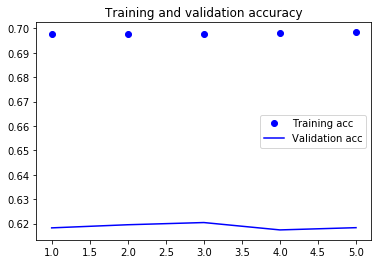

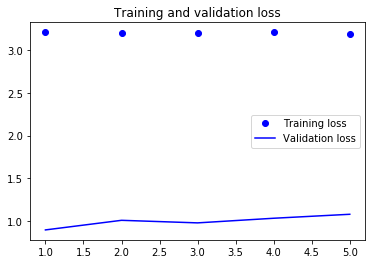

In [102]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()